# Importing libraries and modules necessary for our project

In [132]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # Ignores any warning
warnings.filterwarnings("ignore")
import scipy as scp
print("Initial setup is complete")

Initial setup is complete


In [6]:
sales_test = pd.read_csv("C:\\Users\\DELL\\Downloads\\Test.csv")
sales_train = pd.read_csv("C:\\Users\\DELL\\Downloads\\train.csv")
sales_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
sales_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Commencing Preprocessing Phase

**Dealing with missing values:**

In [10]:
sales_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
sales_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [15]:
sales_test['Item_Weight'].mean()

12.695633368756374

In [16]:
sales_train['Item_Weight'].mean()

12.857645184136183

In [20]:
sales_train['Item_Weight'].fillna(value=sales_train['Item_Weight'].mean(), inplace=True)
sales_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [21]:
sales_test['Item_Weight'].fillna(value=sales_test['Item_Weight'].mean(), inplace=True)
sales_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

**Replacing categorical NaN values:**

In [24]:
sales_test.Outlet_Size = sales_test.Outlet_Size.fillna('Medium')

In [25]:
sales_train.Outlet_Size = sales_train.Outlet_Size.fillna('Medium')

In [26]:
print(sales_test.isnull().sum())
print(sales_train.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [27]:
#Missing values have been dealt with, now we will concat both datasets for an easier representation
sales = pd.concat([sales_train, sales_test],ignore_index=True)
sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792847,0.065953,141.004977,1997.830681,2181.288914
std,4.234354,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027036,94.012000,1987.000000,834.247400
50%,12.850000,0.054021,142.247000,1999.000000,1794.331000
75%,16.000000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [28]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


# Exploratory Data Analysis

The goal for the EDA is to get some insight and if any irregularities are found

In [30]:
# Check for duplicates
idsTotal = sales_train.shape[0]
idsDupli = sales_train[sales_train['Item_Identifier'].duplicated()]
print(f'There are {len(idsDupli)} duplicate IDs for {idsTotal} total entries')

There are 6964 duplicate IDs for 8523 total entries


This shows that our Item_Identifier has some duplicate values. since a product can exist in more than one store it is expected for this repetition.

# 1) Univariate Analysis

**a) Numerical Predictors**

Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

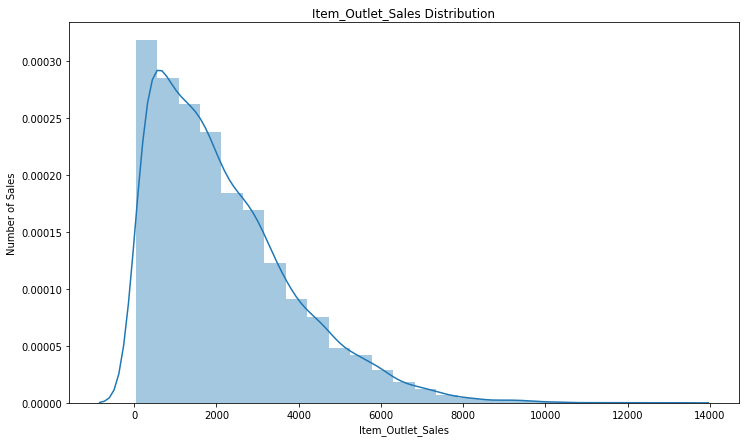

In [32]:
plt.figure(figsize=(12,7))
sns.distplot(sales_train.Item_Outlet_Sales, bins = 25)
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

Distribution of the target variable: "Item_Outlet_Sales"


In [34]:
print ("Skew is:", sales_train.Item_Outlet_Sales.skew())
print("Kurtosis: %f" % sales_train.Item_Outlet_Sales.kurt())

Skew is: 1.1775306028542798
Kurtosis: 1.615877


We can see that our target variable is skewed towards the right. Therefore, we have to normalize it.

In [35]:
num_features = sales_train.select_dtypes(include=[np.number])
num_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

We can see that out of 12 we have only 5 numeric variables

In [36]:
corr=num_features.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


In [37]:
corr['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.011550
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

From the above result, we can see that Item_MRP have the most positive correlation and the Item_Visibility have the lowest correlation with our target variable. It is totally different from our initial hypotheses, this variables was expected to have high impact in the sales increase.

**b) Categorical Predictors**

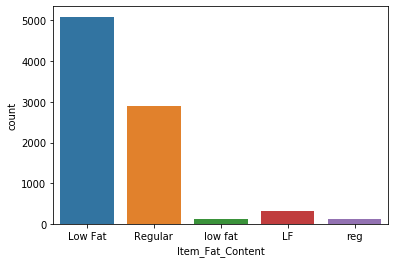

In [39]:
sns.countplot(sales_train.Item_Fat_Content)

For Item_Fat_Content there are two possible type “Low Fat” or “Regular”. However, in our data it is written in different manner. We will rectify this:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

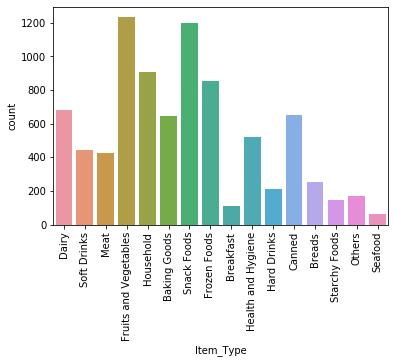

In [41]:
sns.countplot(sales_train.Item_Type)
plt.xticks(rotation=90)

for 'Item_Type' we have 16 different types of unique values and it is high number for categorical variable. Therefore we must try to reduce it.

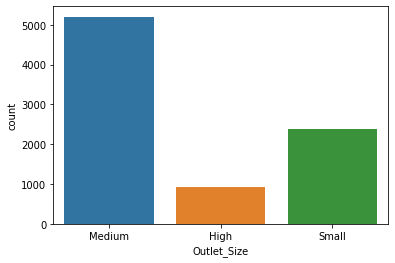

In [43]:
sns.countplot(sales_train.Outlet_Size)

There seems to be less number of stores with size equals to “High”

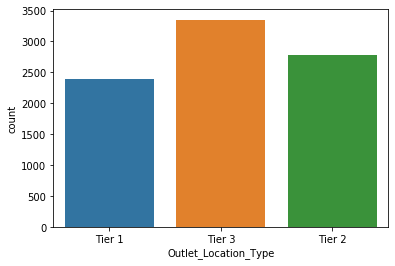

In [45]:
sns.countplot(sales_train.Outlet_Location_Type)

From the above graph we can see that Bigmart is a brand of medium and small size city compare to densely populated area

- Distribution of the variable 'Outlet_Type' :

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

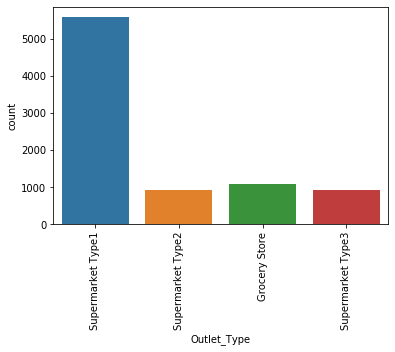

In [48]:
sns.countplot(sales_train.Outlet_Type)
plt.xticks(rotation=90)

# Bivariate Analysis

Now we calculate the relationship between our predictors and target variable

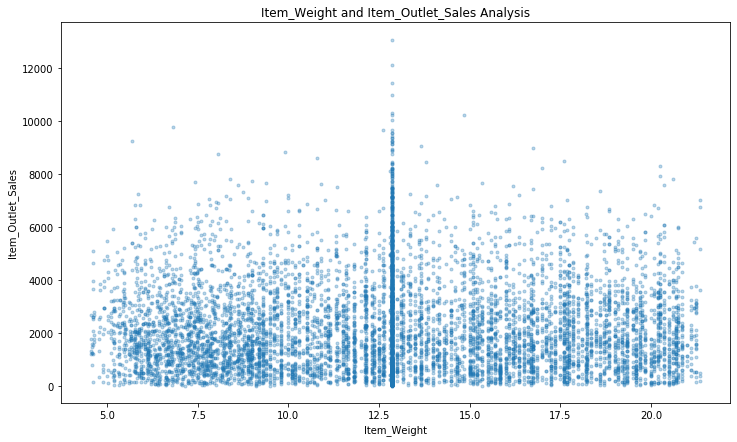

In [50]:
# Item_Weight and Item_Outlet_Sales analysis

plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(sales_train.Item_Weight, sales_train["Item_Outlet_Sales"],'.', alpha = 0.3)

We saw previously that Item_Weight had a low correlation with our target variable. This plot shows their relation.

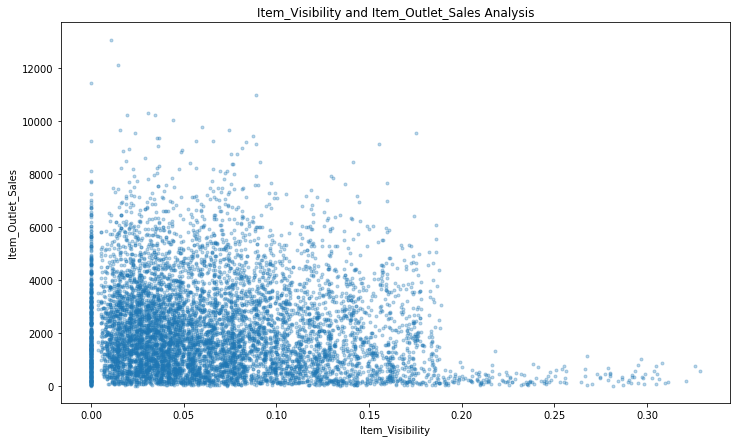

In [51]:
#Item_Visibility and Item_Outlet_Sales analysis

plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(sales_train.Item_Visibility, sales_train["Item_Outlet_Sales"],'.', alpha = 0.3)

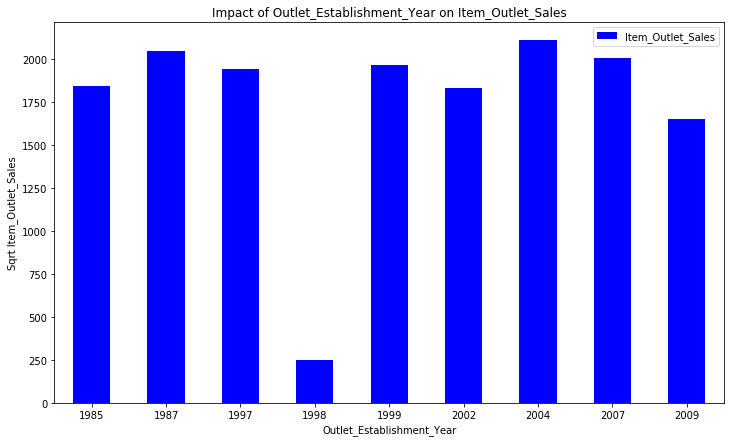

In [52]:
# Outlet_Establishment_Year and Item_Outlet_Sales analysis

Outlet_Establishment_Year_pivot = sales_train.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

As we can see, there isn't much meaning sense between the year of store establishment and sales for items

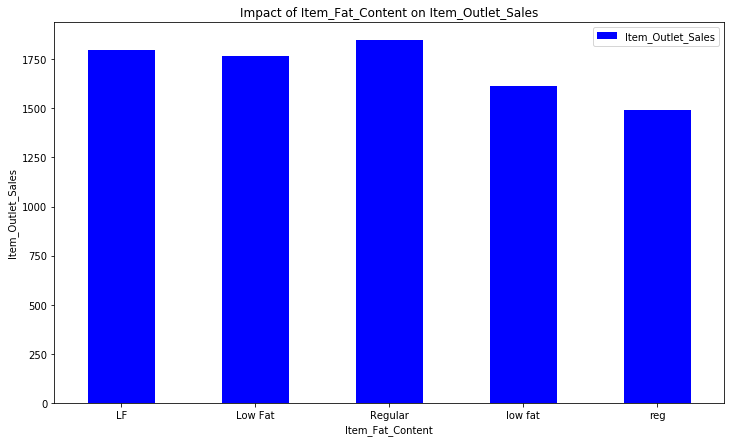

In [53]:
# Impact of Item_Fat_Content onItem_Outlet_Sales

Item_Fat_Content_pivot = sales_train.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Low Fat products seem to have higher average sales than the Regular products

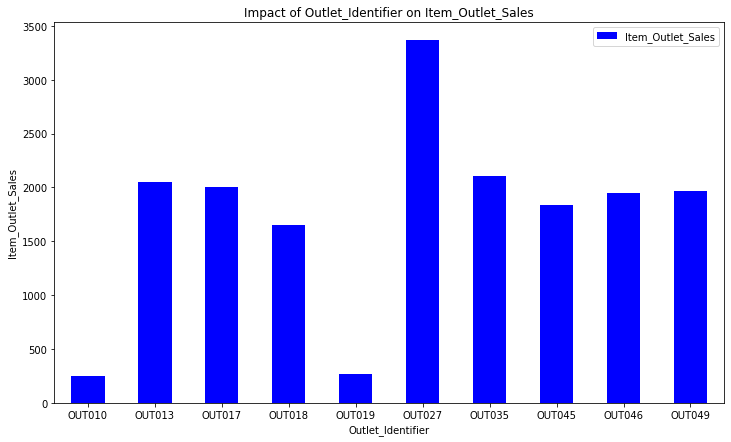

In [54]:
# Impact of Outlet_Identifier on Item_Outlet_Sales

Outlet_Identifier_pivot = sales_train.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Out of 10- There are 2 Groceries strore, 6 Supermarket Type1, 1Supermarket Type2, and 1 Supermarket Type3. You can see from the below pivot table

In [56]:
sales_train.pivot_table(values='Outlet_Type',
                  columns='Outlet_Identifier',
                  aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [57]:
sales_train.pivot_table(values='Outlet_Type',
                  columns='Outlet_Size',
                  aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type1,Supermarket Type1


Most of the stores are of Supermarket Type1 of size High and they do not have best results. whereas Supermarket Type3 (OUT027) is a Medium size store and have best results.

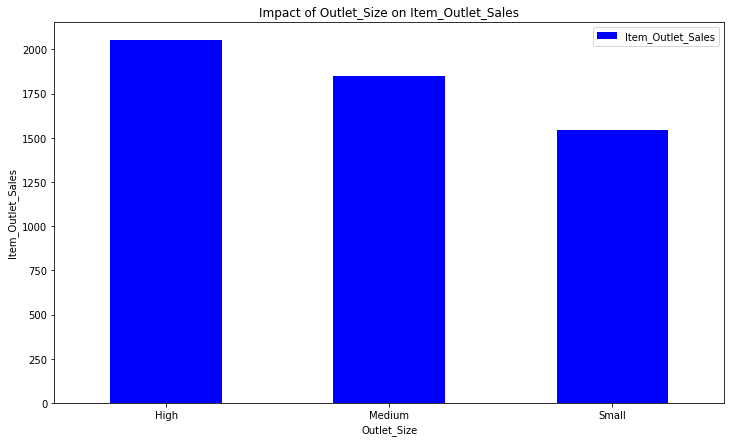

In [58]:
# Impact of Outlet_Size on Item_Outlet_Sales

Outlet_Size_pivot = sales_train.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Size_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Size")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

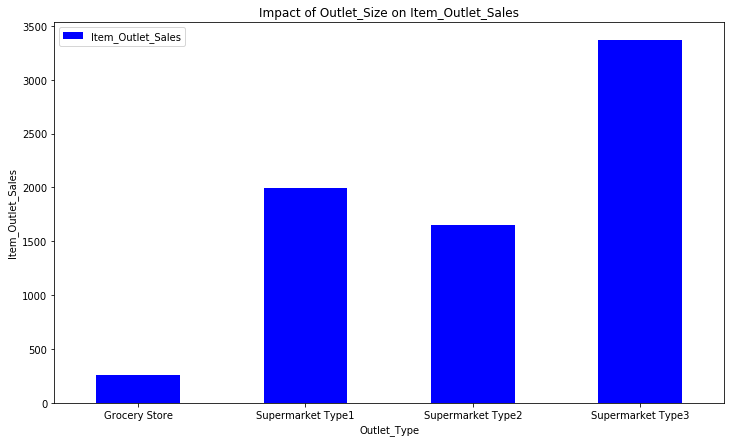

In [59]:
# Impact of Outlet_Type on Item_Outlet_Sales

Outlet_Type_pivot = sales_train.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

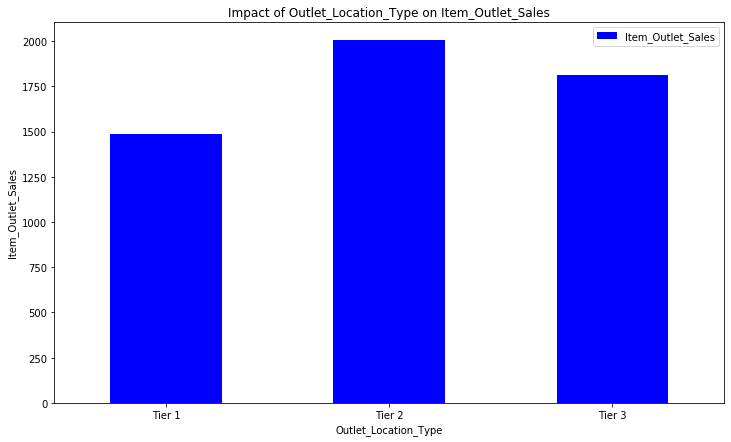

In [60]:
# Impact of Outlet_Location_Type on Item_Outlet_Sales

Outlet_Location_Type_pivot = sales_train.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Location_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Location_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

This shows that our hypotheses was totaly different from the result that we got from the above plot. Tier 2 cities have the higher sales than the Tier 1 and Tier 2.

In [61]:
sales_train.pivot_table(values='Outlet_Location_Type',
                  columns='Outlet_Type',
                  aggfunc=lambda x:x.mode())

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,Tier 3,Tier 2,Tier 3,Tier 3


# One-Hot Encoding of Categorical Values

In [65]:
#Item type combine:
sales['Item_Identifier'].value_counts()
sales['Item_Type_Combined'] = sales['Item_Identifier'].apply(lambda x: x[0:2])
sales['Item_Type_Combined'] = sales['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
sales['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [66]:
#Import library:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
#New variable for outlet
sales['Outlet'] = le.fit_transform(sales['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    sales[i] = le.fit_transform(sales[i])

In [67]:
#One Hot Coding:
sales = pd.get_dummies(sales, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])

In [68]:
sales.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,0,1,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,0,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,0,1,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,0,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,0,1,...,0,1,0,0,0,0,0,0,0,0


In [69]:
sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Item_Fat_Content_3             uint8
Item_Fat_Content_4             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
O

# Exporting Sales Data

In [78]:
#Drop the columns which have been converted to different types:
sales.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
sales_train = sales.loc[sales['source']=="sales_train"]
sales_test = sales.loc[sales['source']=="sales_test"]

#Drop unnecessary columns:
sales_test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
sales_train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
sales_train.to_csv("train_modified.csv",index=False)
sales_test.to_csv("test_modified.csv",index=False)

# Building Models

In [131]:
#We will read data from our modified datasets and later compare with our original dataset through visualizations

train2 = pd.read_csv("C:\\Users\DELL\Desktop\\train_modified.csv")
test2 = pd.read_csv("C:\\Users\\DELL\Desktop\\test_modified.csv")

In [80]:
train2.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,0.016047,9.30,OUT049,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,OUT018,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,OUT049,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,0.000000,19.20,OUT010,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,0.000000,8.93,OUT013,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [91]:
X_train = train2.drop(['Item_Outlet_Sales', 'Outlet_Identifier','Item_Identifier'], axis=1)
y_train = train2['Item_Outlet_Sales']

In [92]:
X_test = test2.drop(['Outlet_Identifier','Item_Identifier'], axis=1)


In [93]:
X_train.head()

,Item_MRP,Item_Visibility,Item_Weight,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,249.8092,0.016047,9.30,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,48.2692,0.019278,5.92,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,141.6180,0.016760,17.50,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,182.0950,0.000000,19.20,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,53.8614,0.000000,8.93,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [94]:
y_train.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

# Linear Regression Model

In [96]:
# Fitting Multiple Linear Regression to the training set
from sklearn.linear_model import  LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [98]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([1848.53604783, 1472.81670435, 1875.65285894, ..., 1809.18796433,
       3565.6645235 , 1267.46171871])

In [101]:
import warnings
warnings.filterwarnings('ignore')
# Measuring Accuracy
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

In [102]:
lr_accuracy = round(regressor.score(X_train,y_train) * 100,2)
lr_accuracy

56.36

In [103]:
r2_score(y_train, regressor.predict(X_train))

0.5635892777270479

In [106]:
import warnings
warnings.filterwarnings('ignore')
#Perform cross-validation:
cv_score = cross_val_score(regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [108]:
print(np.sqrt(np.abs(cv_score)))

[1150.93927648 1118.68414103 1112.89657923 1126.30724065 1140.59735737]


In [109]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(X_train))))

RMSE : 1127


In [110]:
submission = pd.DataFrame({
'Item_Identifier':test2['Item_Identifier'],
'Outlet_Identifier':test2['Outlet_Identifier'],
'Item_Outlet_Sales': y_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [111]:
submission.to_csv('submission1.csv',index=False)

# Decision Tree Model:

In [112]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=300)

In [113]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([1673.98398729, 1349.51290433,  471.30684669, ..., 1892.06614452,
       3805.94860417, 1349.51290433])

In [114]:
tree_accuracy = round(regressor.score(X_train,y_train),2)
tree_accuracy

0.59

In [115]:
r2_score(y_train, regressor.predict(X_train))

0.5884050821570486

In [117]:
import warnings
warnings.filterwarnings('ignore')
cv_score = cross_val_score(regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(np.sqrt(np.abs(cv_score)))

[1138.77137157 1109.42501179 1145.66395939 1113.2648073  1129.0816826 ]


In [118]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(X_train))))

RMSE : 1095


In [119]:
submission = pd.DataFrame({
'Item_Identifier':test2['Item_Identifier'],
'Outlet_Identifier':test2['Outlet_Identifier'],
'Item_Outlet_Sales': y_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [120]:
submission.to_csv('submission2.csv',index=False)

# Random Forest Model

In [121]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=50, n_jobs=4)

In [122]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([1656.30005703, 1364.01666974,  590.25900051, ..., 1965.2677407 ,
       3754.32111793, 1298.10167994])

In [123]:
rf_accuracy = round(regressor.score(X_train,y_train),2)
rf_accuracy

0.61

In [124]:
r2_score(y_train, regressor.predict(X_train))

0.6123817418836499

In [126]:
import warnings
warnings.filterwarnings('ignore')
cv_score = cross_val_score(regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(np.sqrt(np.abs(cv_score)))

[1099.36298868 1078.14663381 1076.60189358 1070.01833078 1084.17176414]


In [127]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(X_train))))

RMSE : 1062


In [128]:
submission = pd.DataFrame({
'Item_Identifier':test2['Item_Identifier'],
'Outlet_Identifier':test2['Outlet_Identifier'],
'Item_Outlet_Sales': y_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [129]:
submission.to_csv('submission3.csv',index=False)

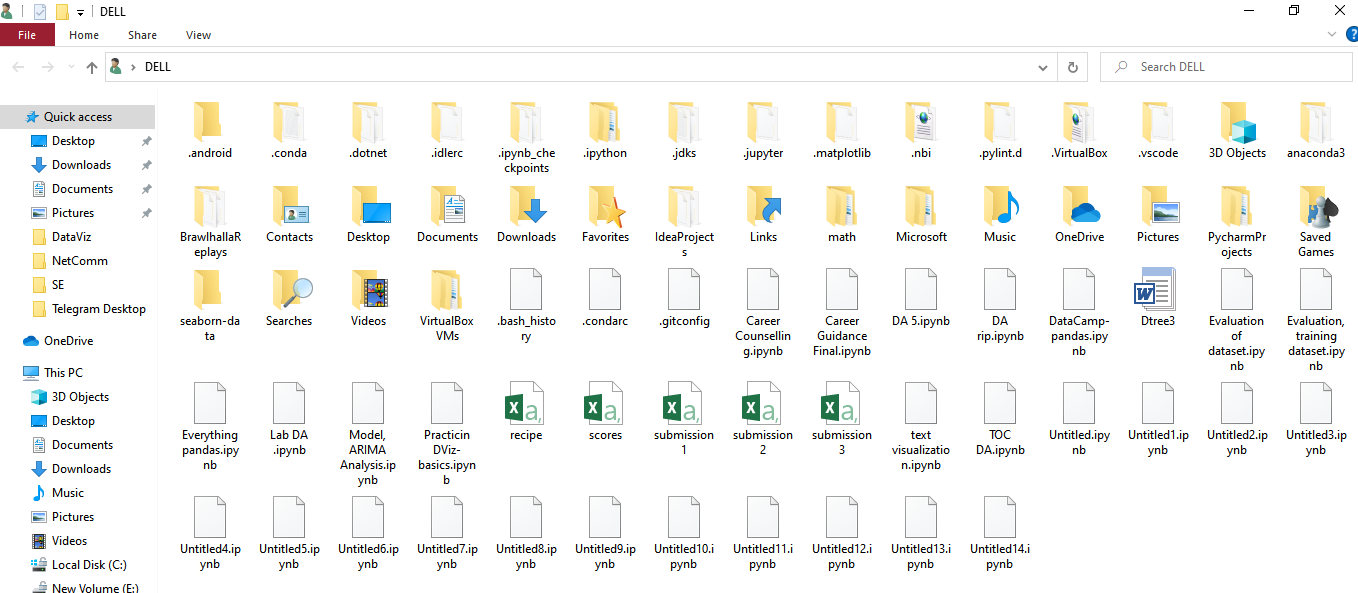

In [130]:
#Image showing all the submission csv files

from IPython.display import Image
Image(filename='C:\\Users\\DELL\\Documents\\Lightshot\\Screenshot_6.png')    